In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression

### Simple Linear Regression
#### Introduction

* Simple regression model
* Easy to use
* Easy to understand
* Fast

#### Model Representation
Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It assumes the true relationship between x and y is linear $Y = \beta_0 + \beta_1X + \epsilon$

- $y$ is the response
- $x$ is the predictor
- $\beta_0$ Intercept
- $\beta_1$ Slope
- $\epsilon$ is a random error with mean 0 and constant variance

$\beta_0$ and $\beta_1$ are called the **model coefficients**

What does this look like?

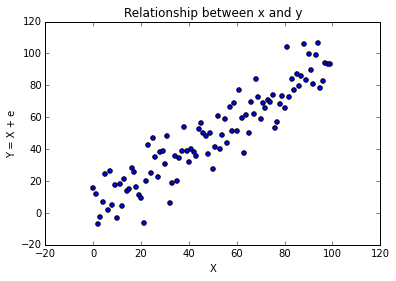

In [58]:
random_normal = np.random.randn(100)
x = np.arange(100)
e = np.random.randn(100)*10
y = x+e

plt.scatter(x,y)
plt.title('Relationship between x and y')
plt.xlabel('X')
plt.ylabel('Y = X + e')

$y = \beta_0 + \beta_1x + \epsilon$
- $\beta_0 = 0$ 
- $\beta_1 = 1$
- $\epsilon = e$

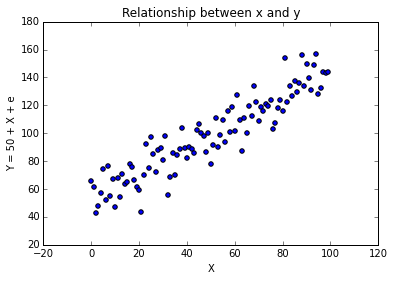

In [59]:
y = 50+x+e

plt.scatter(x,y)
plt.title('Relationship between x and y')
plt.xlabel('X')
plt.ylabel('Y = 50 + X + e')

$y = \beta_0 + \beta_1x + \epsilon$
- $\beta_0 = 50$ 
- $\beta_1 = 1$
- $\epsilon = e$

#### Estimation

How this works
* Assuming the true relationship: $Y = \beta_0 + \beta_1X + \epsilon$
* Estimate $\beta_0$ and $\beta_1$ denote estimates by $\hat{\beta_0}$ and $\hat{\beta_1}$
* Use estimates to make predictions $\hat{y}=\hat{\beta_0} + \hat{\beta_1}x $

How do we estimate $\beta_0$ and $\beta_1$?
* Given a data set $(x_1, y_1),(x_2,y_2),...,(x_n,y_n)$
* For a given estimate define the residual as $e_i=y_i-\hat{y_i}=y_i-\hat{\beta_0} + \hat{\beta_1}x_i$
<img src="RSS2.gif">
* Residual Sum Squares $(RSS) =\sum_i e^{2}_i$

* Objective: Find the $\beta_0$ and $\beta_1$ that minimize Residual Sum Squares $(RSS) =\sum_i e^{2}_i$

#### Estimate with Scikit Learn

coefficient [ 0.92368381]
intercept 52.7176045598


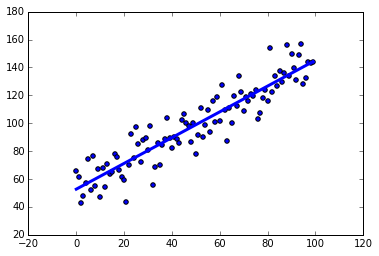

In [75]:
from sklearn import linear_model
rgr = linear_model.LinearRegression()
rgr.fit(x.reshape(100, 1),y)
print("coefficient {}".format(rgr.coef_))
print("intercept {}".format(rgr.intercept_))

plt.scatter(x,y)
plt.plot(x, rgr.predict(x.reshape(100, 1)), color='blue',linewidth=3)

#### Estimate with Statsmodels

('Parameters: ', Intercept    52.717605
X             0.923684
dtype: float64)
('R2: ', 0.85847816129258148)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     594.5
Date:                Mon, 14 Sep 2015   Prob (F-statistic):           2.13e-43
Time:                        23:03:54   Log-Likelihood:                -380.09
No. Observations:                 100   AIC:                             764.2
Df Residuals:                      98   BIC:                             769.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------

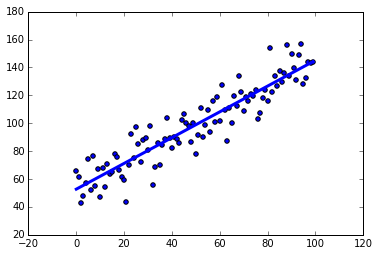

In [76]:
import statsmodels.formula.api as sm

df = pd.DataFrame({'X':x, 'Y':y})
model = sm.ols(formula='Y ~ X', data=df)
results = model.fit()
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print(results.summary())
plt.scatter(x,y)
plt.plot(x, results.predict(pd.DataFrame(df['X'])), color='blue',linewidth=3)

#### Estimate with Scipy

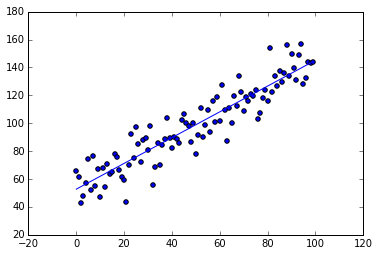

In [77]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x, y)
plt.scatter(x, y)
plt.plot(x, intercept + slope * x)

### LAB: Advertising Dataset
* What is the slope and intercept?
* How would you interpret the results?
* Does any one media method appear better than another?

### Multiple Linear Regression

Extension of simple linear regression to several variables. $Y = \beta_0 + \beta_1X_1 + ... + \beta_pX_p + \epsilon$

* Estimate $\beta_0$,..., $\beta_p$ denote estimates by $\hat{\beta_0}$,...,$\hat{\beta_p}$
* Use estimates to make predictions $\hat{y}=\hat{\beta_0} + \hat{\beta_1}x_1 +...+ \hat{\beta_p}x_p $

How do we estimate $\beta_0$,..., $\beta_p$?
* Given a data set $(x_{1,1},..,x_{1,p}, y_1),(x_{2,1},..,x_{2,p},y_2),...,(x_{n,1},..,x_{n,p},y_n)$
* Minimize RSS


In [7]:
import random

x1= np.random.randint(100,size=100)
x2= np.random.randint(100,size=100)
y = 2*x1 + 3*x2 + np.random.randn(100)*10

data = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
data.head()

,x1,x2,y
0,39,39,195.619125
1,77,51,324.569727
2,50,62,282.073642
3,97,6,219.539744
4,71,31,228.509245


In [11]:
rgr = linear_model.LinearRegression()
rgr.fit(data[['x1','x2']],data['y'])
results = rgr.predict(data[['x1','x2']])-data['y']

In [23]:
model = sm.ols(formula='y ~ x1+x2', data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     3827.
Date:                Mon, 14 Sep 2015   Prob (F-statistic):           5.32e-93
Time:                        20:49:39   Log-Likelihood:                -379.39
No. Observations:                 100   AIC:                             764.8
Df Residuals:                      97   BIC:                             772.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.0254      3.012      2.664      0.0

### Hypothesis Test and P-Values 

Hypothesis Test:
* Null Hypothesis: Default hypothesis
* Alternative Hypothesis: Alternative to the Null
* Check data to see if there is enough evidence to reject the null in favor of the alternative
* p-value: Used as a threshold to reject the null. Usually 0.05. (probability of seeing the data or more extreme if the null hypothesis is true)

In linear regression:
* Null hypothesis is that there is no relationship between predictor and response

### R-Squared
* Coefficient of determination
* Proportion of variance explained
* Used as a measure of how well the model fits
* Goes from 0 to 1 where the higher the better
* Adding more features always improves r-squared. Adjusted r-squared tries to correct for this

### Lab: Advertising Data
* What are the coefficients?
* What is the r-squared value?
* What are the p-values? 
* What features are most important?
* How would you interpret these results?

### Dummie Variables
Dummie variables are a way to numerically encode categorical variables so they can be used in specific models. The pandas method get_dummies() will perform this task. In general, for n categores you only need n-1 dummie variables.

In [26]:
categories = ['apple', 'orange', 'banana', 'banana', 'orange', 'orange']
pd.get_dummies(categories)

,apple,banana,orange
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
5,0,0,1


### Interactions and Polynomials

#### Interactions

In [27]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [39]:
advertising['Newpaper_Radio'] = advertising['Radio']*advertising['Newspaper'] 

In [40]:
model = sm.ols(formula='Sales ~ TV+Radio+Newspaper+Newpaper_Radio', data=advertising)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.6
Date:                Mon, 14 Sep 2015   Prob (F-statistic):           3.25e-95
Time:                        22:21:14   Log-Likelihood:                -385.95
No. Observations:                 200   AIC:                             781.9
Df Residuals:                     195   BIC:                             798.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          3.1467      0.437      7.

In [41]:
model = sm.ols(formula='Sales ~ TV+Radio+TV*Radio', data=advertising)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 14 Sep 2015   Prob (F-statistic):          6.68e-146
Time:                        22:23:55   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

#### Polynomials

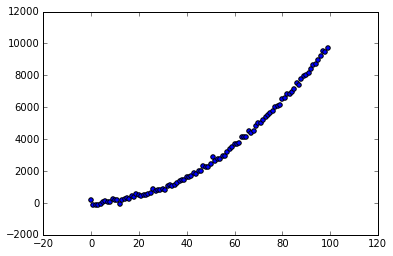

In [54]:
random_normal = np.random.randn(100)
x = np.arange(100)
y = x**2+np.random.randn(100)*100
plt.scatter(x,y)

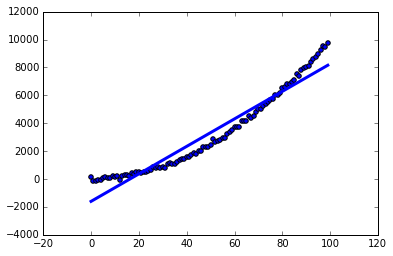

In [55]:
df = pd.DataFrame({'X':x, 'Y':y})
model = sm.ols(formula='Y ~ X', data=df)
results = model.fit()
plt.scatter(x,y)
plt.plot(x, results.fittedvalues, color='blue',linewidth=3)

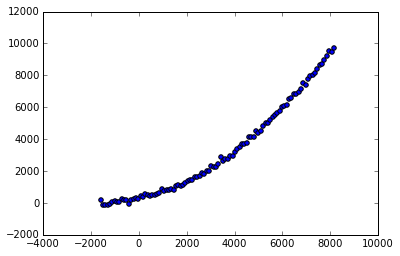

In [56]:
plt.scatter(results.fittedvalues, y)
#plt.plot( color='blue',linewidth=3)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     334.6
Date:                Mon, 14 Sep 2015   Prob (F-statistic):           1.10e-50
Time:                        23:27:38   Log-Likelihood:                -820.68
No. Observations:                 100   AIC:                             1649.
Df Residuals:                      96   BIC:                             1660.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.069e-10   2.51e-11      4.256      0.0

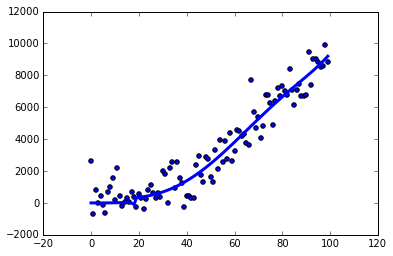

In [104]:
random_normal = np.random.randn(100)
x = np.arange(100)
y = x+x**2+np.random.randn(100)*1000
plt.scatter(x,y)

df = pd.DataFrame({'X':x, 'X2':x*x, 'X3':x*x*x,'X4':x*x*x*x,'X5':x*x*x*x*x, 'X6':x*x*x*x*x*x, 'X15':x**15, 'Y':y})
model = sm.ols(formula='Y ~X+X2+X3+X4+X5+X6+X15', data=df)
results = model.fit()
print(results.summary())
#plt.scatter(x,y)
plt.plot(x, results.fittedvalues, color='blue',linewidth=3)
